Segmenta apenas os círculos maiores da imagem, use a técnica que achar melhor. E exibe o resultado.

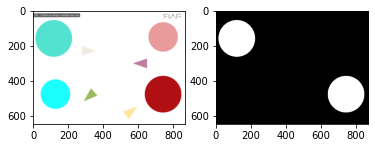

In [53]:
%matplotlib inline
import cv2
import math
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


image_lower_hsv = np.array([80, 140, 220]) 
image_upper_hsv = np.array([190, 170, 235])
mask1 = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

image_lower_hsv2 = np.array([160, 230, 150])   
image_upper_hsv2 = np.array([200, 255, 200])
mask2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

finalMask = cv2.bitwise_or(mask1, mask2)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)

plt.subplot(1, 2, 2)
plt.imshow(finalMask, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

Exibe na imagem a área e o centro de massa dos dois círculos segmentados da imagem. O resultado esperado e uma imagem com um marcação no centro indicando o CM e o valor da área;

centro de massa na possição do circulo 0 :  476 737
centro de massa na possição do circulo 1:  160 117


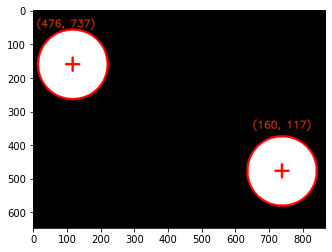

In [54]:
contornos, _ = cv2.findContours(finalMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 


mask_rgb = cv2.cvtColor(finalMask, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy()

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

#Circulo 0

cnt = contornos[0]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print("centro de massa na possição do circulo 0 : ",cy, cx)
size = 20
color = (255, 0, 0)

cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (10,50)

cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


#Circulo 1

cnt = contornos[1]
M = cv2.moments(cnt)
cx1 = int(M['m10']/M['m00'])
cy1 = int(M['m01']/M['m00'])
print("centro de massa na possição do circulo 1: ",cy1, cx1)
size = 20
color = (255, 0, 0)

cv2.line(contornos_img,(cx1 - size,cy1),(cx1 + size,cy1),color,5)
cv2.line(contornos_img,(cx1,cy1 - size),(cx1, cy1 + size),color,5)

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy1 , cx1
origem = (650,350)

cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)



plt.imshow(contornos_img);

Traça uma reta entre os dois centros dos círculos; 

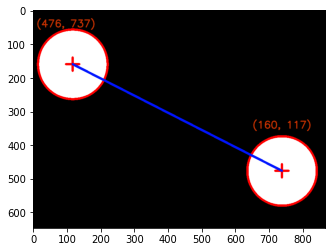

In [55]:
cv2.line(contornos_img,(cx,cy),(cx1,cy1),(0, 21, 255),5)

plt.imshow(contornos_img);

Calcula o ângulo de inclinação da reta em relação ao plano horizontal, inclinação em graus. O resultado esperado é uma imagem com  uma reta entre centros e valor do ângulo exibido na tela;  

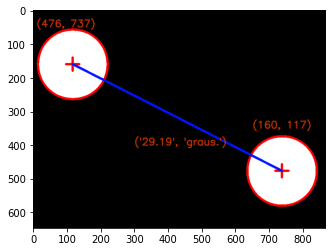

In [52]:
x = [cx1, cx]
y = [cy1, cy]
slope, intercept = np.polyfit(x,y,1)

pi=22/7
radian = slope/(pi/180)
radianTruncado = int(radian * 10**2)/10**2
text = str(radianTruncado),"graus."


font = cv2.FONT_HERSHEY_SIMPLEX
origem = (300,400)
cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)



plt.imshow(contornos_img);